In [2]:
import pandas as pd

df = pd.read_csv("AdidasMatchday20240419.csv")

df["return_rate"] = df["too_small"] + df["too_large"]


In [3]:
segments = df.groupby(["sports_categories", "gender_last"])


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

for (sport, gender), group in segments:
    corr = group.corr(numeric_only=True)["return_rate"].sort_values(ascending=False)
    print(f"\n🔹 {sport} | {gender}\n", corr)



🔹 Basketball | Female
 return_rate      1.000000
too_large        0.862644
last_id          0.712584
too_small        0.693881
model_id        -0.000939
article_id      -0.007476
toe_height      -0.215994
insole_length   -0.503731
ball_girth      -0.564609
heel_spring     -0.614335
heel_width      -0.642343
ball_width      -0.687787
Name: return_rate, dtype: float64

🔹 Basketball | Male
 return_rate      1.000000
too_large        0.769431
too_small        0.677712
heel_width       0.338253
model_id         0.133296
article_id       0.073121
last_id          0.029530
heel_spring     -0.254710
ball_girth      -0.267827
ball_width      -0.371573
insole_length   -0.480588
toe_height      -0.521286
Name: return_rate, dtype: float64

🔹 Football | Female
 return_rate      1.000000
too_small        0.771309
model_id         0.306258
ball_width       0.132410
article_id      -0.060541
heel_width      -0.086678
heel_spring     -0.231771
too_large       -0.397574
last_id         -0.440433
toe_he

In [5]:
import numpy as np

best_ranges = {}

for (sport, gender), group in segments:
    print(f"\n=== {sport} | {gender} ===")
    best_ranges[(sport, gender)] = {}
    
    for col in ["insole_length","ball_girth","ball_width","heel_width","toe_height","heel_spring"]:
        bins = np.linspace(group[col].min(), group[col].max(), 6)  # 5 equal bins
        group["bin"] = pd.cut(group[col], bins)

        results = group.groupby("bin")["return_rate"].mean().sort_values()
        best_bin = results.index[0]

        best_ranges[(sport, gender)][col] = best_bin
        print(col, best_bin, "-> Avg Return:", results.iloc[0])



=== Basketball | Female ===
insole_length (280.46, 282.7] -> Avg Return: 0.3454750780055401
ball_girth (255.0, 260.0] -> Avg Return: 0.4321566559876733
ball_width (101.48, 103.8] -> Avg Return: 0.3438156725585669
heel_width (67.0, 68.5] -> Avg Return: 0.36832389395819465
toe_height (28.76, 30.4] -> Avg Return: 0.3205839963009411
heel_spring (8.9, 10.7] -> Avg Return: 0.36306856761686407

=== Basketball | Male ===
insole_length (279.62, 282.1] -> Avg Return: 0.4320971722659347
ball_girth (260.2, 265.5] -> Avg Return: 0.4517980547346324
ball_width (100.2, 101.8] -> Avg Return: 0.43919391665424684
heel_width (60.5, 62.4] -> Avg Return: 0.4307452082014858
toe_height (29.12, 30.9] -> Avg Return: 0.38055306441784637
heel_spring (11.3, 13.5] -> Avg Return: 0.43042338148198855

=== Football | Female ===
insole_length (275.66, 277.48] -> Avg Return: 0.21977676908413826
ball_girth (251.3, 254.0] -> Avg Return: 0.2083745195155683
ball_width (94.86, 95.8] -> Avg Return: 0.22822246300111612
heel_w

C:\Users\aditi\AppData\Local\Temp\ipykernel_24448\4174024335.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results = group.groupby("bin")["return_rate"].mean().sort_values()
C:\Users\aditi\AppData\Local\Temp\ipykernel_24448\4174024335.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results = group.groupby("bin")["return_rate"].mean().sort_values()
C:\Users\aditi\AppData\Local\Temp\ipykernel_24448\4174024335.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to a

In [6]:
recommendations = []

for (sport, gender), group in segments:
    best = group.loc[group["return_rate"].idxmin()]
    
    recommendations.append([
        sport,
        gender,
        best["insole_length"],
        best["ball_girth"],
        best["ball_width"],
        best["heel_width"],
        best["toe_height"],
        best["heel_spring"],
        best["return_rate"]
    ])

columns = ["Sports_categories","Gender_last",
           "Insole Length","Ball Girth","Ball Width","Heel Width",
           "Toe Height","Heel Spring","Return Rate"]

df_rec = pd.DataFrame(recommendations, columns=columns)
print(df_rec)
df_rec.to_csv("data_analysis_recommendations.csv", index=False)


  Sports_categories Gender_last  Insole Length  Ball Girth  Ball Width  \
0        Basketball      Female          277.0       265.0       101.5   
1        Basketball        Male          271.9       246.0        94.4   
2          Football      Female          276.9       254.0        95.2   
3          Football        Male          276.0       253.0        94.6   
4           Running      Female          275.2       249.5        96.8   
5           Running        Male          278.5       240.5        94.4   

   Heel Width  Toe Height  Heel Spring  Return Rate  
0        70.0        30.4          9.0     0.301948  
1        60.5        27.6         13.5     0.300575  
2        65.0        29.8         10.5     0.158554  
3        69.0        28.5          8.0     0.062103  
4        66.0        25.3          8.5     0.121521  
5        69.0        25.8          8.5     0.050170  


In [7]:
submission = df_rec.drop(columns=["Return Rate"])
submission.to_csv("final_submission.csv", index=False)


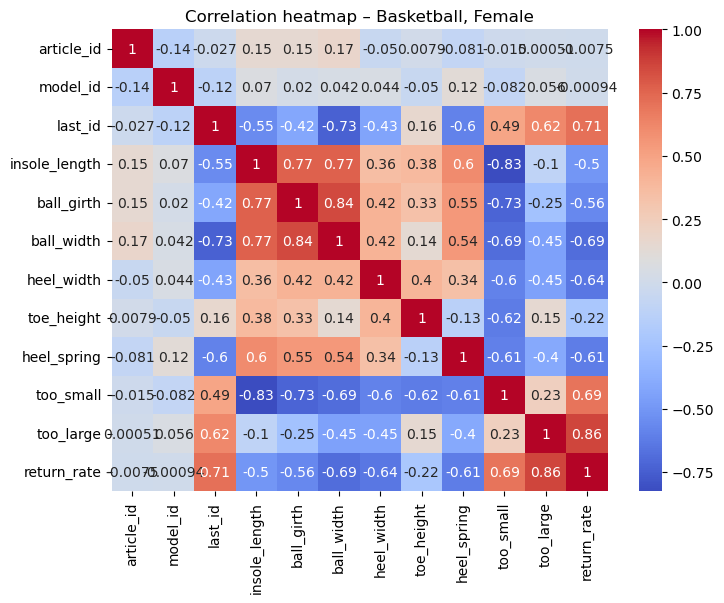

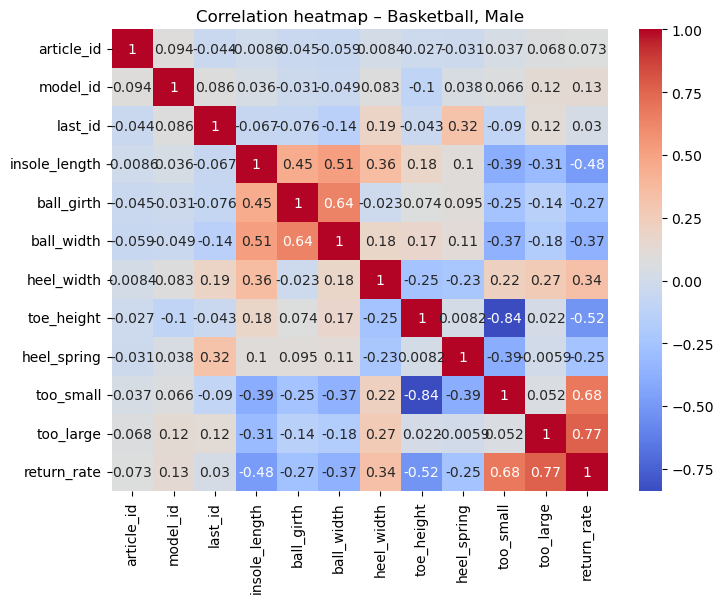

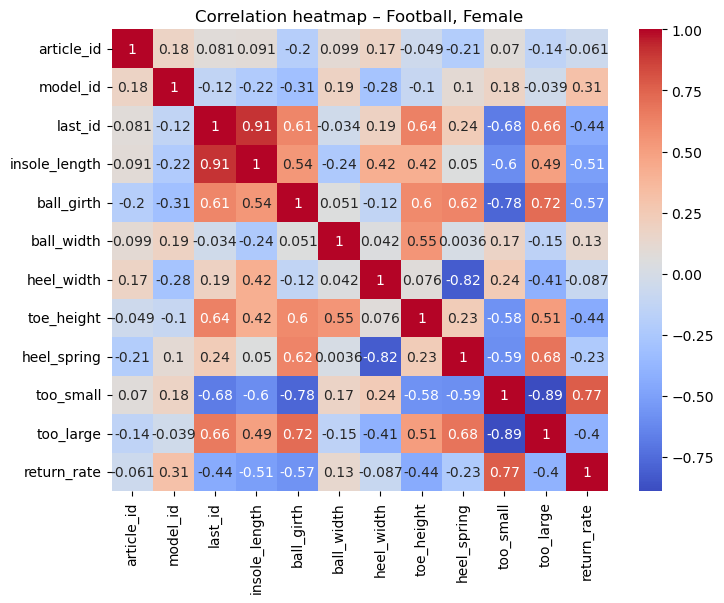

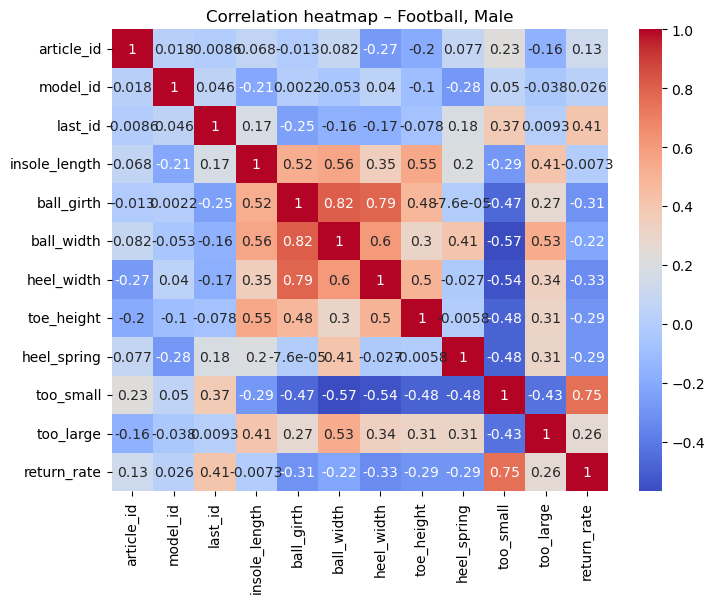

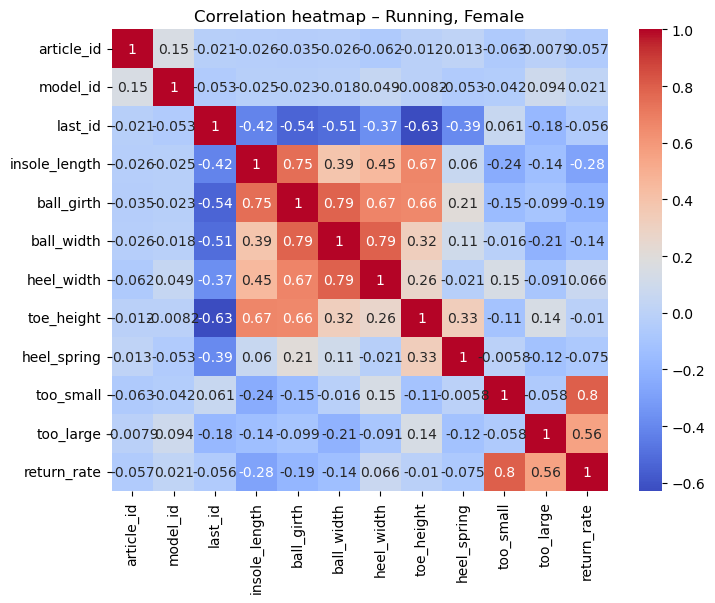

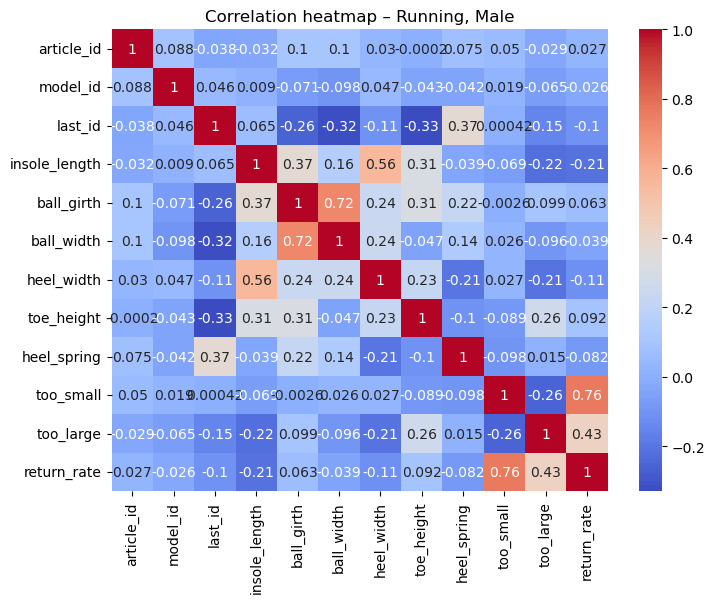

In [ ]:
for (sport, gender), group in df.groupby(["sports_categories", "gender_last"]):
    numeric = group.select_dtypes(include="number")   # keep only numeric columns
    corr = numeric.corr()                             # or corr(numeric_only=True) in new pandas

    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap="coolwarm")
    plt.title(f"Correlation heatmap – {sport}, {gender}")
    plt.show()

<Axes: xlabel='ball_girth', ylabel='return_rate'>

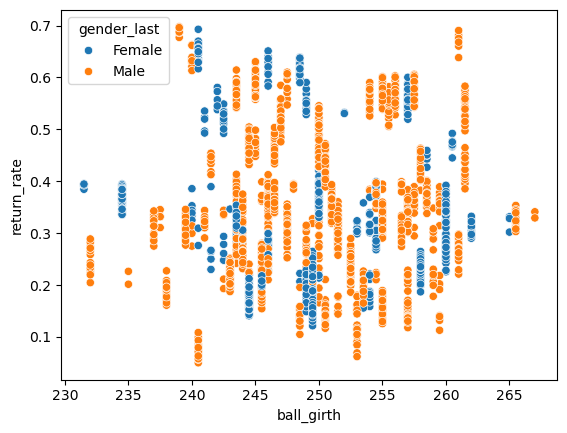

In [ ]:
sns.scatterplot(x="ball_girth", y="return_rate", hue="gender_last", data=df)